In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, 
VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score,
recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve)

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### Load the data

In [2]:
data = pd.read_csv(r"C:\Users\st203\OneDrive\Desktop\Telecom Customers Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Explore the dataset

In [4]:
# Check the shape of dataset 
data.shape

(7043, 21)

In [5]:
# check the basic information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# statistical summary 
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Here we can see 75% of people have tenure less than 55 months.
* Average Monthly Charges are 64.76 USD whereas 75% customers pay more than 89.85 per month and maximum Monthly charges are 118.75 USD.

In [7]:
# Unique values in data

data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Exploratry Data Analysis (EDA)

#### Visualization

In [8]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


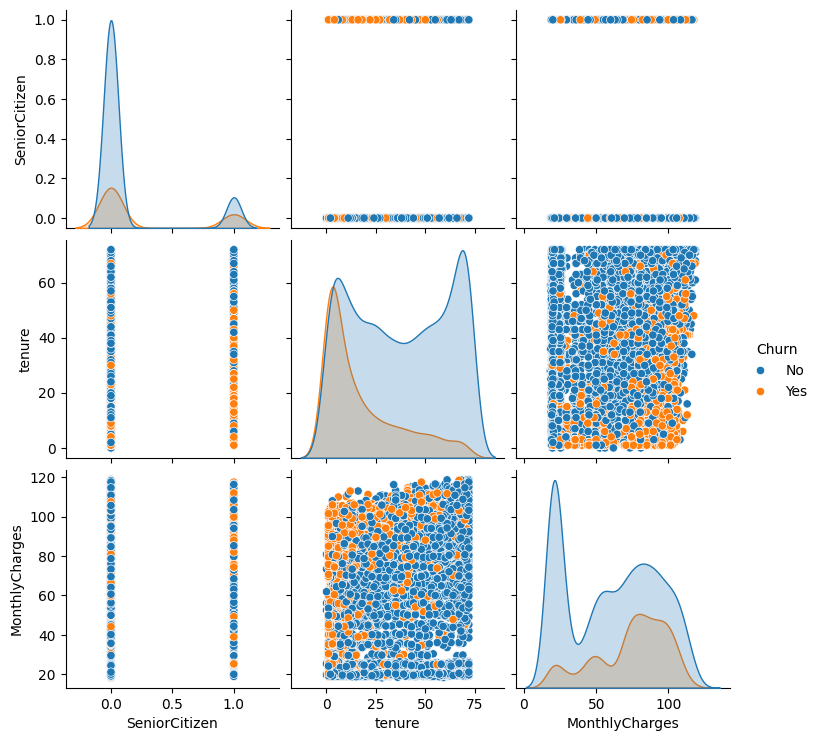

In [9]:
sns.pairplot(data,hue='Churn')
plt.show()

* Churn si high when Monthly Charges are high.
* Churn is high at starting tenure and churn is low as tenure increases.

In [10]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

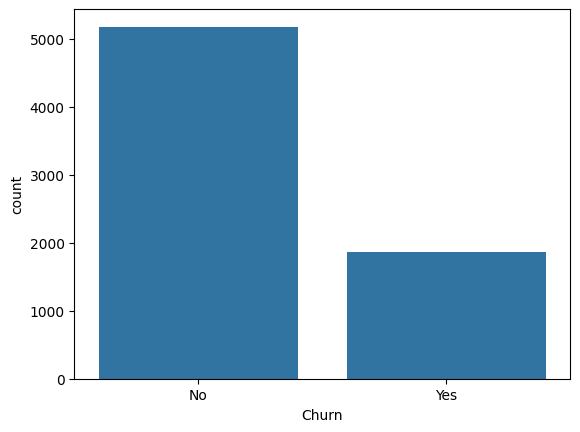

In [11]:
sns.countplot(x='Churn',data=data)
plt.show()

Here we can see Churn data is imbalance it shows 'No' Churn is high.

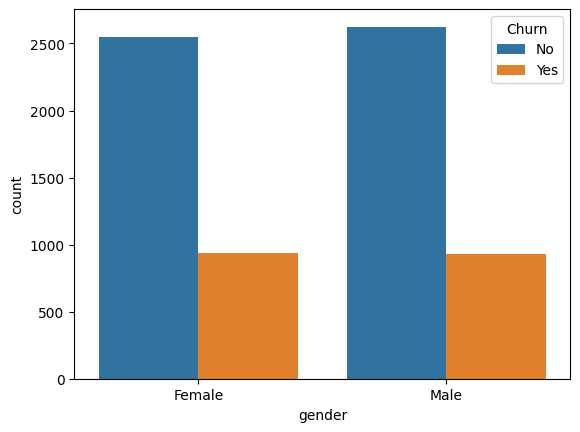

In [12]:
sns.countplot(x='gender',data=data,hue='Churn')
plt.show()

Churn in male and female are approximately same whereas in the No-churn male are more than female.

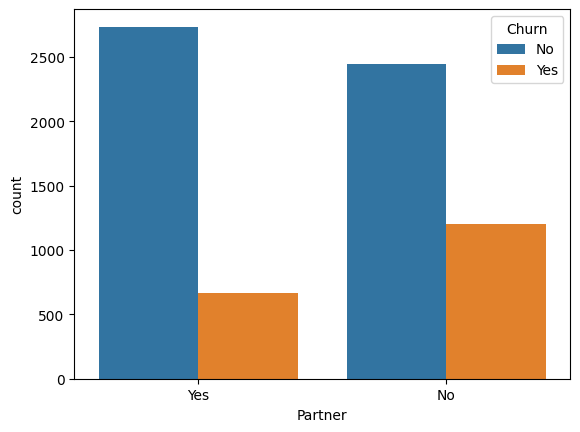

In [13]:
sns.countplot(x='Partner',data=data,hue='Churn')
plt.show()

People have partner has less churn.


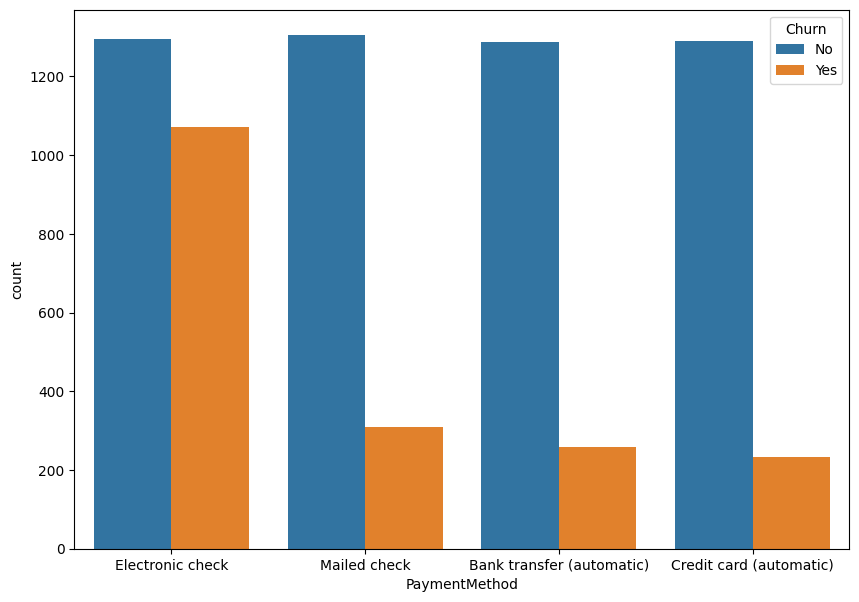

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x='PaymentMethod',data=data,hue='Churn')
plt.show()

Churn are high in Electronic Check payment.

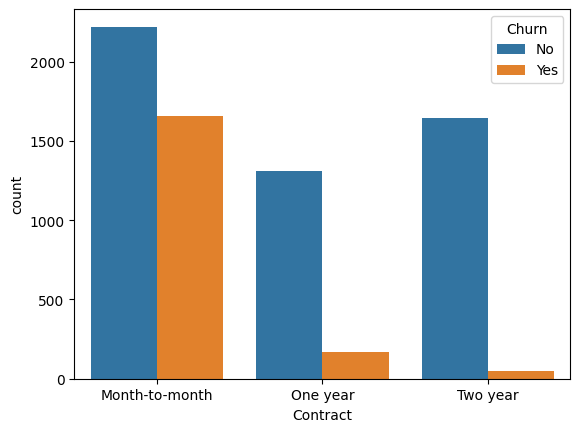

In [15]:
sns.countplot(x='Contract',data=data,hue='Churn')
plt.show()

Month to month Contract has high Churn. 

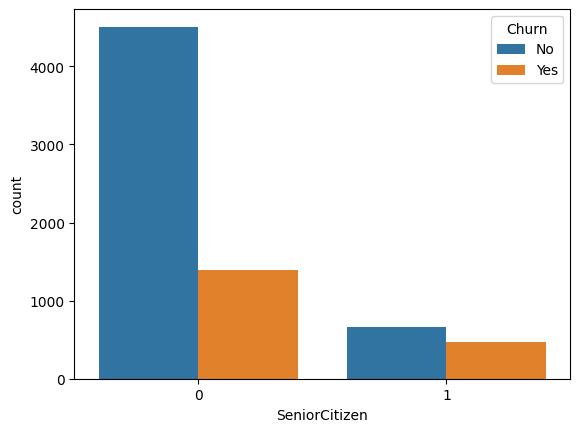

In [16]:
sns.countplot(x='SeniorCitizen',data=data,hue='Churn')
plt.show()

We can see that senior citiznes has low churn.

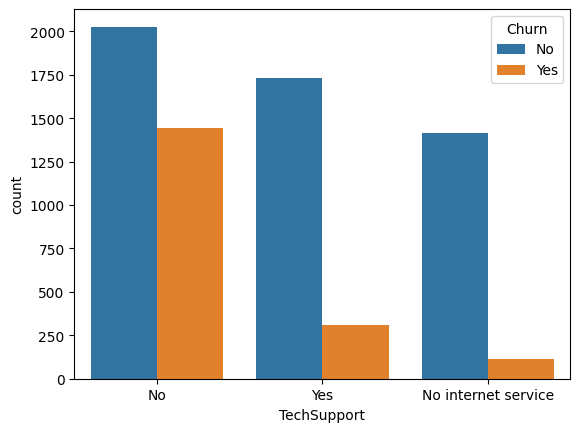

In [17]:
sns.countplot(x='TechSupport',data=data,hue='Churn')
plt.show()

'No techsupport' category has high churn and 'No internet service' has low churn.

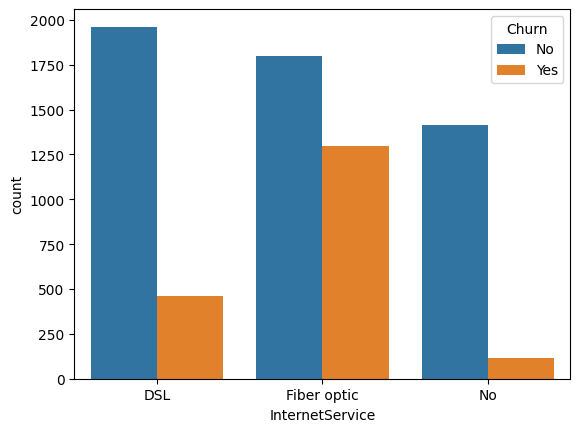

In [18]:
sns.countplot(x='InternetService',data=data,hue='Churn')
plt.show()

'Fiber optic' has high churn and 'No internet service' has low churn.

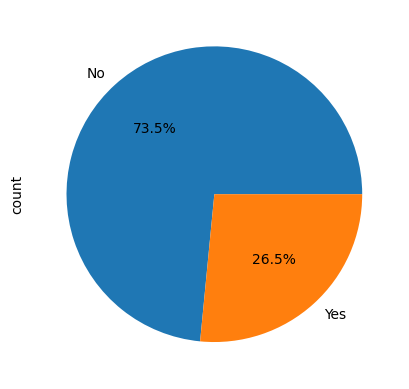

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [19]:
data['Churn'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()
print(data['Churn'].value_counts())

Here we can see that Churn is 26.5% and No churn is 73.5, the data is imbalance.

### Data preprocessing 

##### Fix the defects

In [20]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors= "coerce")

In [21]:
# Check the null values in data

data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Data has no null values.

In [22]:
data.loc[data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**In Totalcharges column 11 NaN values are present, we have to drop that values for model building.**

In [23]:
# Check duplicate records in data

data.duplicated().sum()

0

There are no duplicate records in the data.

In [24]:
# Dropping null values 
data.dropna(axis=0,inplace=True)

In [25]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### One Hot Encoding

In [26]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
dummies = (['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
            'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod',])

In [28]:
new_data= pd.get_dummies(data, columns=dummies,dtype=int)
new_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [29]:
new_data.dtypes

customerID                                  object
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
gender_Female                                int32
gender_Male                                  int32
SeniorCitizen_0                              int32
SeniorCitizen_1                              int32
Partner_No                                   int32
Partner_Yes                                  int32
Dependents_No                                int32
Dependents_Yes                               int32
PhoneService_No                              int32
PhoneService_Yes                             int32
MultipleLines_No                             int32
MultipleLines_No phone service               int32
MultipleLines_Yes                            int32
InternetService_DSL                          int32
InternetService_Fiber optic    

In [30]:
# Drop unwanted columns
new_data.drop(columns='customerID',axis = 1,inplace=True)

###### Converting target variable into Binary values (yes=1, No=0)

In [31]:
# new_data['Churn']=np.where(new_data['Churn']=='Yes',1,0) 

new_data['Churn']=new_data['Churn'].map({'Yes':1,'No':0})

In [32]:
new_data.nunique()

tenure                                       72
MonthlyCharges                             1584
TotalCharges                               6530
Churn                                         2
gender_Female                                 2
gender_Male                                   2
SeniorCitizen_0                               2
SeniorCitizen_1                               2
Partner_No                                    2
Partner_Yes                                   2
Dependents_No                                 2
Dependents_Yes                                2
PhoneService_No                               2
PhoneService_Yes                              2
MultipleLines_No                              2
MultipleLines_No phone service                2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
OnlineSecurity_No                       

In [33]:
new_data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [34]:
new_data.Churn.nunique()

2

##### Correlation Analysis

In [35]:
new_data.corr()


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.015683,0.015683,-0.381912,0.381912,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.219874,0.219874,-0.097825,0.097825,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.102411,0.102411,-0.319072,0.319072,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,-0.150541,0.150541,0.149982,-0.149982,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen_0,-0.015683,-0.219874,-0.102411,-0.150541,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,...,-0.119842,-0.137752,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987
SeniorCitizen_1,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-1.000000,1.000000,-0.016957,0.016957,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
Partner_No,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,0.016957,-0.016957,1.000000,-1.000000,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-0.016957,0.016957,-1.000000,1.000000,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948


## Train Test Split

In [36]:
x = new_data.drop(columns='Churn')
x

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,0,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [37]:
y = new_data['Churn']
y.shape

(7032,)

In [38]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

**Now lets split the data into a trainng set and a testing set we will trian our model on training set and then use 
the test set to evaluate the model**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.3 ,random_state=1)

In [41]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4922, 46) (2110, 46) (4922,) (2110,)


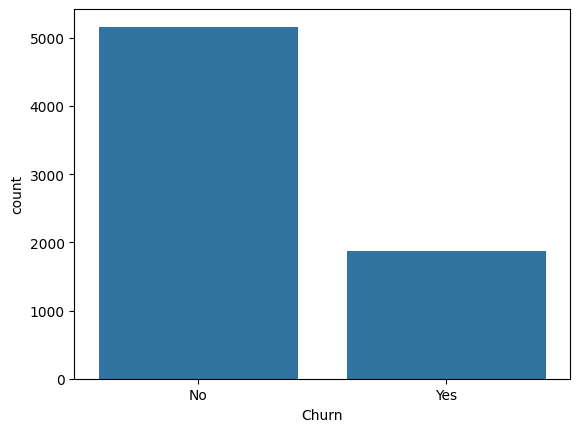

Churn
0    5163
1    1869
Name: count, dtype: int64

In [42]:
sns.countplot(x='Churn',data= data)
plt.show()

new_data['Churn'].value_counts()

Here we can see the data is imbalance 

Implement Random over Sampler for balancing data

In [43]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(random_state=42)

x_res, y_res = os.fit_resample(x,y)

x_res.shape ,y_res.shape

((10326, 46), (10326,))

In [44]:
x_train.head(3)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1584,65,53.50,3517.90,1,0,0,1,1,0,1,...,1,0,0,1,0,1,1,0,0,0
1043,32,69.75,2347.90,0,1,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1077,41,114.50,4527.45,1,0,1,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0


In [45]:
x_test.head(3)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1778,72,24.75,1859.10,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
5036,16,85.35,1375.15,1,0,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1106,63,97.45,6253.00,1,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,0,0


In [46]:
from collections import Counter

In [47]:
print('Original Dataset Shape{}0'.format(Counter(y)))
print('Resample Dataset Shape{}0'.format(Counter(y_res)))

Original Dataset ShapeCounter({0: 5163, 1: 1869})0
Resample Dataset ShapeCounter({0: 5163, 1: 5163})0


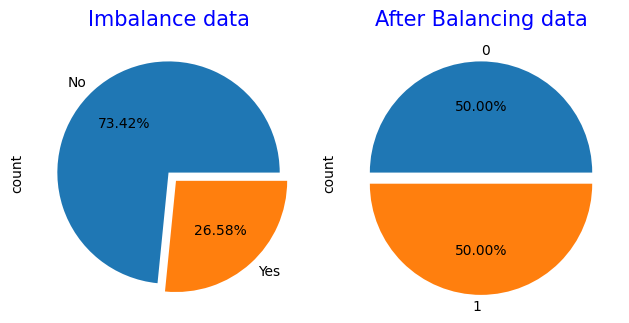

In [48]:
plt.subplot(1,2,1)
plt.title('Imbalance data',fontsize= 15,c="b")
data['Churn'].value_counts().plot.pie(autopct='%.2f%%',explode=(0,0.1))

plt.subplot(1,2,2)
plt.title('After Balancing data',fontsize= 15,c="b")
y_res.value_counts().plot.pie(autopct='%.2f%%',explode=(0,0.1))

plt.tight_layout()

#### Model building after balancing the data

In [49]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_res,y_res,test_size=0.3,random_state=1)

## Predictive Modeling 

### Logistic Regression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(xr_train,yr_train)

yr_pred = lr.predict(xr_test)
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1574
           1       0.75      0.79      0.77      1524

    accuracy                           0.76      3098
   macro avg       0.77      0.76      0.76      3098
weighted avg       0.77      0.76      0.76      3098



In [52]:
print('Confusion matrix:',confusion_matrix(yr_test,yr_pred))

Confusion matrix: [[1168  406]
 [ 324 1200]]


In [53]:
print('Accuracy score',accuracy_score(yr_test,yr_pred)*100)

Accuracy score 76.43641058747579


### Decision Tree Classifier 

In [54]:
dtree= DecisionTreeClassifier()

dtree.fit(xr_train,yr_train)

yr_pred = dtree.predict(xr_test)

In [55]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1574
           1       0.80      0.93      0.86      1524

    accuracy                           0.85      3098
   macro avg       0.86      0.86      0.85      3098
weighted avg       0.86      0.85      0.85      3098



In [56]:
print('Confusion matrix:',confusion_matrix(yr_test,yr_pred))

print('Accuracy score',accuracy_score(yr_test,yr_pred)*100)

Confusion matrix: [[1226  348]
 [ 105 1419]]
Accuracy score 85.37766300839252


### Random Forest Classifier

In [57]:
rfc= RandomForestClassifier(n_estimators=700)

rfc.fit(xr_train,yr_train)

yr_pred = rfc.predict(xr_test)


In [58]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      1574
           1       0.85      0.94      0.89      1524

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098



In [59]:
print('Confusion matrix:',confusion_matrix(yr_test,yr_pred))

print('Accuracy score',accuracy_score(yr_test,yr_pred)*100)

Confusion matrix: [[1315  259]
 [  91 1433]]
Accuracy score 88.70238863783085


### Naive Baye's

In [60]:
Nv= GaussianNB()

Nv.fit(xr_train,yr_train)

yr_pred = Nv.predict(xr_test)


In [61]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.82      0.63      0.71      1574
           1       0.69      0.85      0.76      1524

    accuracy                           0.74      3098
   macro avg       0.75      0.74      0.74      3098
weighted avg       0.76      0.74      0.74      3098



In [62]:
print('Confusion matrix:',confusion_matrix(yr_test,yr_pred))

print('Accuracy score',accuracy_score(yr_test,yr_pred)*100)

Confusion matrix: [[ 993  581]
 [ 221 1303]]
Accuracy score 74.11233053582956


## Results:

### Testing Model

In [63]:
a= np.array(yr_test)
predicted =np.array(rfc.predict(xr_test))
data_com = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [64]:
data_com.head(50)

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


**Model Created successfully!**

**Thank you!**